In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers

In [2]:
#load data
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()
print(xtrain.shape)
print(xtest.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


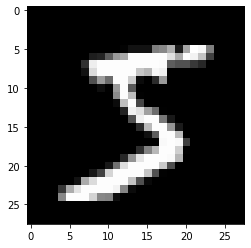

In [3]:
plt.imshow(xtrain[0],cmap="gray")

In [5]:
#normalisasi
xtrain = xtrain/255
xtest = xtest/255

In [6]:
xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000,28*28)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [22]:
xtrain[784]

array([[[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [

In [7]:
#Encoder
input_layer = layers.Input(shape=(784,))
dense1 = layers.Dense(128,activation='relu')(input_layer)

#Code/Bottleneck
dense2 = layers.Dense(64,activation='relu')(dense1)

#Decoder
dense3 = layers.Dense(128,activation='relu')(dense2)
output_layer = layers.Dense(784,activation='sigmoid')(dense3)

model = models.Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,xtrain, epochs=30, batch_size=128, shuffle=True, validation_data=(xtest,xtest))

Epoch 1/30
469/469 [==============================] - 9s 9ms/step - loss: 0.6920 - accuracy: 6.6667e-04 - val_loss: 0.6903 - val_accuracy: 5.0000e-04
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.6885 - accuracy: 6.8333e-04 - val_loss: 0.6863 - val_accuracy: 4.0000e-04
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.6834 - accuracy: 9.8333e-04 - val_loss: 0.6794 - val_accuracy: 8.0000e-04
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.6732 - accuracy: 0.0012 - val_loss: 0.6640 - val_accuracy: 9.0000e-04
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.6468 - accuracy: 0.0020 - val_loss: 0.6198 - val_accuracy: 0.0024
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.5675 - accuracy: 0.0036 - val_loss: 0.4936 - val_accuracy: 0.0052
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.4128 - accuracy: 0.0047 - val_loss: 0.3429 -

In [9]:
encoder = models.Model(input_layer,dense2)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


In [10]:
predenc = encoder.predict(xtest)
print(predenc.shape)
prediction = model.predict(xtest)
print(prediction.shape)

(10000, 64)
(10000, 784)


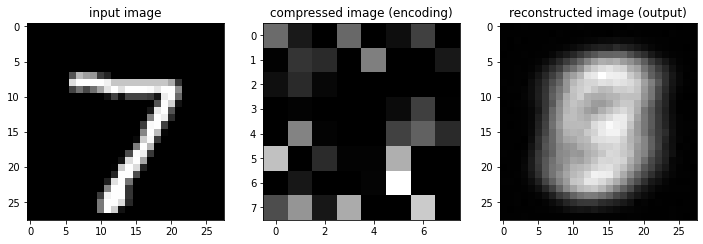

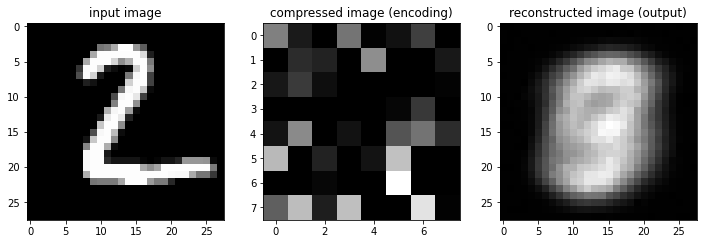

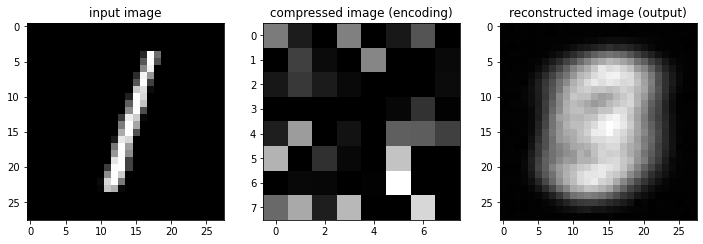

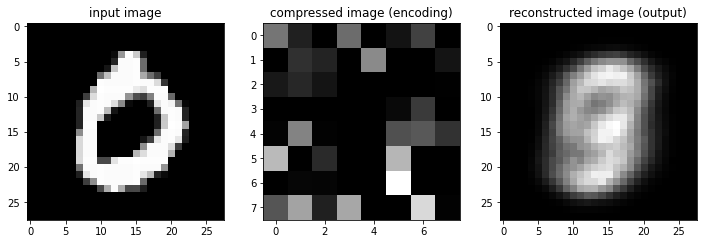

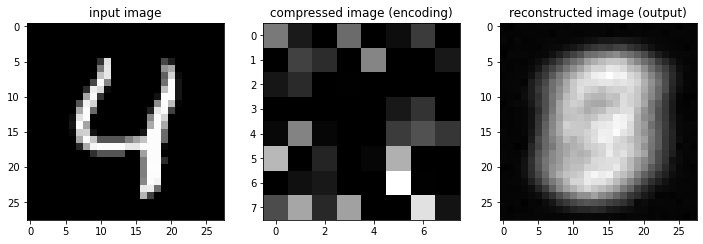

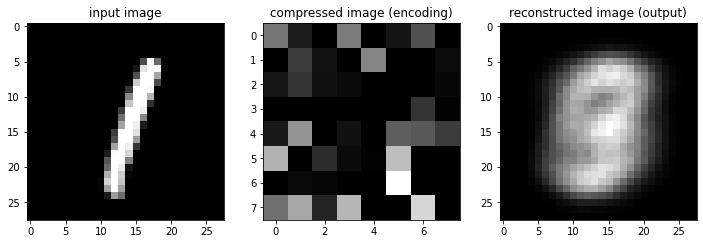

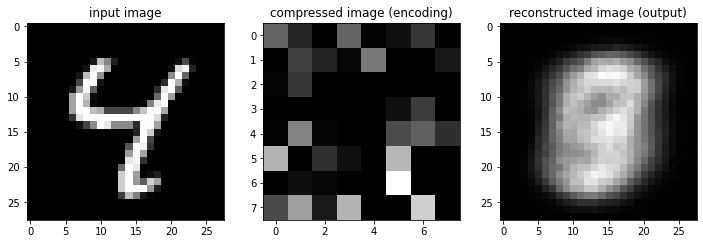

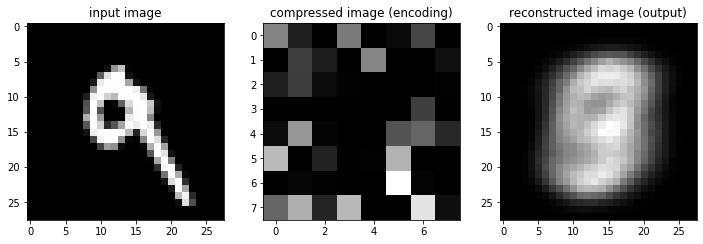

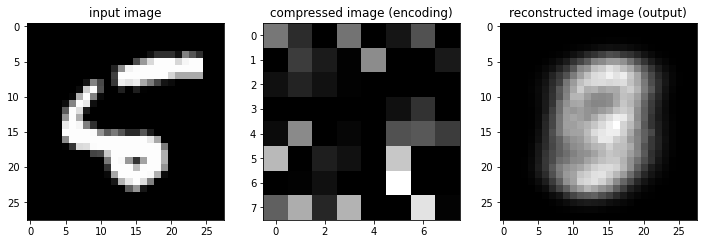

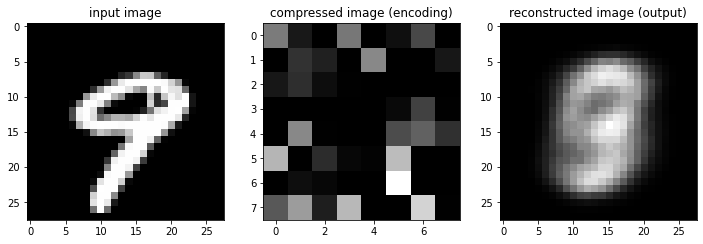

In [11]:
n=10
for i in range(n):
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.title("input image")
  plt.imshow(xtest[i].reshape(28,28),cmap="gray")
  plt.subplot(132)
  plt.title("compressed image (encoding)")
  plt.imshow(predenc[i].reshape(8,8),cmap="gray")
  plt.subplot(133)
  plt.title("reconstructed image (output)")
  plt.imshow(prediction[i].reshape(28,28),cmap="gray")
  plt.show()

In [12]:
#load data
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

#scaling -1 sampai 1
xtrain = (xtrain - (255/2)) / (255/2)
xtest = (xtest - (255/2)) / (255/2)

xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
input_layer = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(16, (3,3),activation="relu",padding="same",strides=(2,2))(input_layer)
conv2 = layers.Conv2D(8, (3,3),activation="relu",padding="same",strides=(2,2))(conv1)
conv3 = layers.Conv2DTranspose(8,(3,3),activation="relu",padding="same",strides=(2,2))(conv2)
conv4 = layers.Conv2DTranspose(16,(3,3),activation="relu",padding="same",strides=(2,2))(conv3)
output_layer = layers.Conv2D(1,(3,3),activation="tanh",padding="same")(conv4)

model2 = models.Model(input_layer,output_layer)
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145 

In [14]:
from tensorflow.keras import losses

In [15]:
model2.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [16]:
import tensorflow as tf
noise_factor = 0.2
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy,-1.0,1.0)
xtest_noisy = tf.clip_by_value(xtest_noisy,-1.0,1.0)

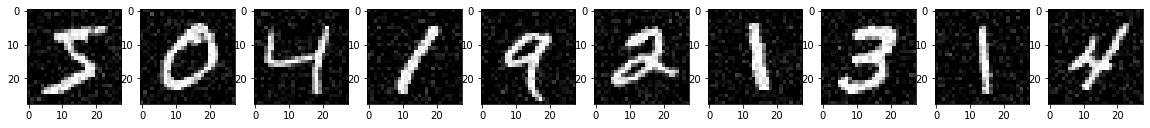

In [17]:
n=10
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(tf.squeeze(xtrain_noisy[i]),cmap="gray")
plt.show()

In [18]:
model2.fit(xtrain_noisy,xtrain, epochs=30,batch_size=128,shuffle=True,validation_data=(xtest_noisy,xtest))

Epoch 1/30
469/469 [==============================] - 13s 13ms/step - loss: 0.1152 - val_loss: 0.0168
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0135 - val_loss: 0.0109
Epoch 3/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 4/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 5/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 6/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 7/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 8/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 9/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 10/30
469/469 [==============================] - 5s 12ms/step - loss: 0.0064 - val_l

In [19]:
prediction = model2.predict(xtest_noisy)
prediction.shape

(10000, 28, 28, 1)

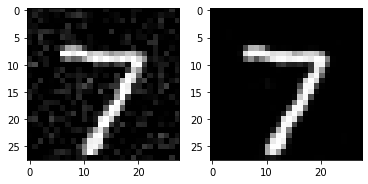

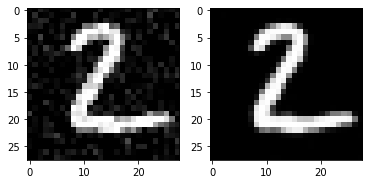

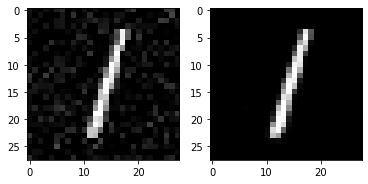

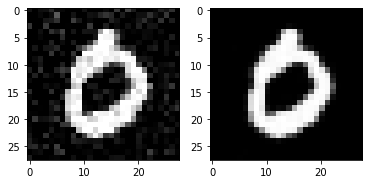

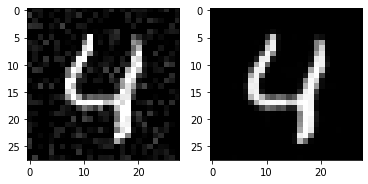

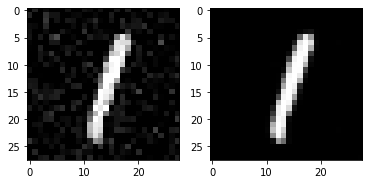

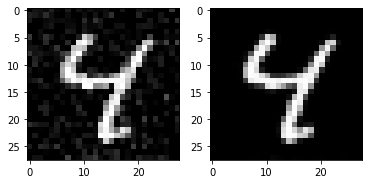

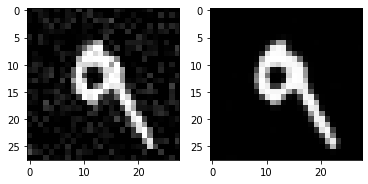

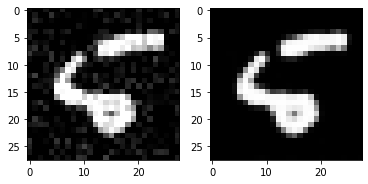

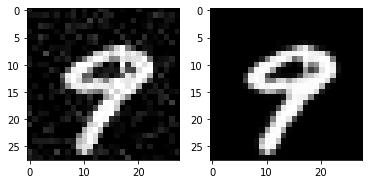

In [20]:
n = 10
for i in range(n):
  plt.subplot(121)
  plt.imshow(tf.squeeze(xtest_noisy[i]),cmap="gray")
  plt.subplot(122)
  plt.imshow(prediction[i].reshape(28,28),cmap="gray")
  plt.show()